In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('suicide-rate.csv')

In [3]:
base.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#This function includes analysis of all numerical data
base.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
#Shows the data types and numerical values of the features in the data set
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
#Set the headings of the feature values in the data set
base.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#Change the names of the columns to avoid future problems
base = base.rename(columns={'sex':'gender', 'suicides_no':'suicidesNumber', 'suicides/100k pop':'suicides100kPop', 'country-year':'countryYear', 'HDI for year':'HDIforYear', ' gdp_for_year ($) ':'gdpForYear', 'gdp_per_capita ($)':'gdpPerCapita'})

In [8]:
base.columns

Index(['country', 'year', 'gender', 'age', 'suicidesNumber', 'population',
       'suicides100kPop', 'countryYear', 'HDIforYear', 'gdpForYear',
       'gdpPerCapita', 'generation'],
      dtype='object')

In [9]:
#Number of rows and columns
base.shape

(27820, 12)

In [10]:
base.isnull().any()

country            False
year               False
gender             False
age                False
suicidesNumber     False
population         False
suicides100kPop    False
countryYear        False
HDIforYear          True
gdpForYear         False
gdpPerCapita       False
generation         False
dtype: bool

In [11]:
base.isnull().sum()

country                0
year                   0
gender                 0
age                    0
suicidesNumber         0
population             0
suicides100kPop        0
countryYear            0
HDIforYear         19456
gdpForYear             0
gdpPerCapita           0
generation             0
dtype: int64

In [12]:
base = base.drop(['HDIforYear', 'countryYear'], axis = 1)

In [13]:
min_year = min(base.year)
max_year = max(base.year)
print('Min year: ', min_year)
print('Max year: ', max_year)

Min year:  1985
Max year:  2016


In [14]:
base_country = base[(base['year'] == min_year)]
country_1985 = base[(base['year'] == min_year)].country.unique()
country_1985_population = []

for Country in country_1985:
    country_1985_population.append(sum(base_country[(base_country['country']==Country)].population))

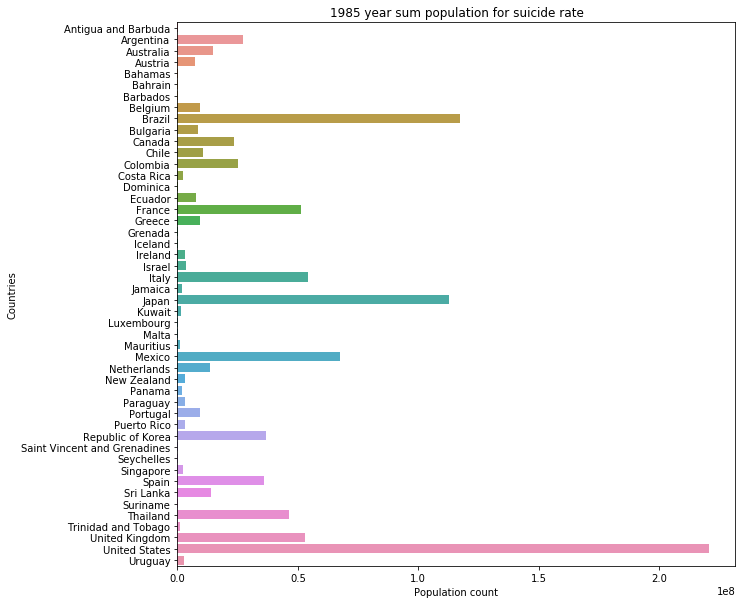

In [15]:
plt.figure(figsize = (10,10))
sns.barplot(y = country_1985, x = country_1985_population)
plt.xlabel('Population count')
plt.ylabel('Countries')
plt.title('1985 year sum population for suicide rate')
plt.show()

In [31]:
suicidesNumber = []
for Country in base.country.unique():
    suicidesNumber.append(sum(base[base['country'] == Country].suicidesNumber))

In [40]:
suicidesNumber = pd.DataFrame(suicidesNumber, columns = ['suicidesNumber'])
Country = pd.DataFrame(base.country.unique(), columns = ['country'])
base_suicide_country = pd.concat([suicidesNumber, Country], axis = 1)
base_suicide_country = base_suicide_country.sort_values(by = 'suicidesNumber', ascending = False)

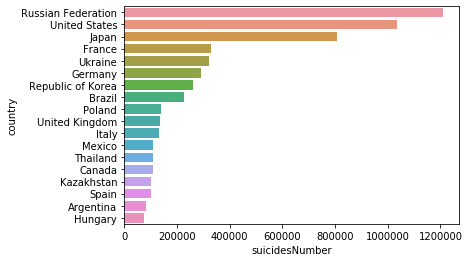

In [44]:
sns.barplot(y = base_suicide_country.country[:18], x = base_suicide_country.suicidesNumber[:18])
plt.show()

In [50]:
group_base = base.groupby(['age', 'gender'])['suicidesNumber'].sum().unstack()
group_base = group_base.reset_index().melt(id_vars = 'age')

group_base_female=group_base.iloc[:6,:]
group_base_male=group_base.iloc[6:,:]

In [51]:
group_base_female

,age,gender,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [52]:
group_base_male

,age,gender,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


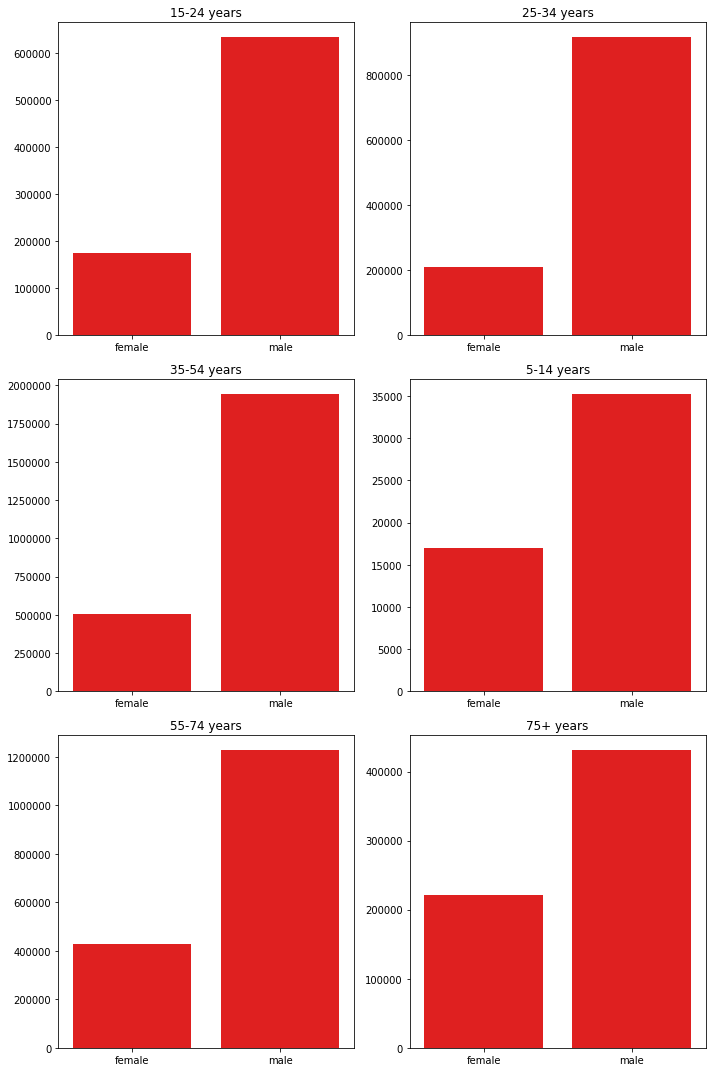

In [53]:
female_ = [175437,208823,506233,16997,430036,221984]
male_ = [633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i, age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3, 2, plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x = ['female', 'male'], y = [female_[i], male_[i]], color = 'red')
    plt.tight_layout()
    fig.set_size_inches(10,15)
plt.show()

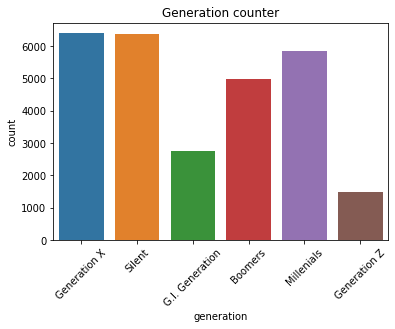

In [54]:
sns.countplot(base.generation)
plt.title('Generation counter')
plt.xticks(rotation = 45)
plt.show()

In [55]:
base['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [56]:
index_population = []
for Age in base['age'].unique():
    index_population.append(sum(base[base['age'] == Age].population)/len(base[base['age'] == Age].population))

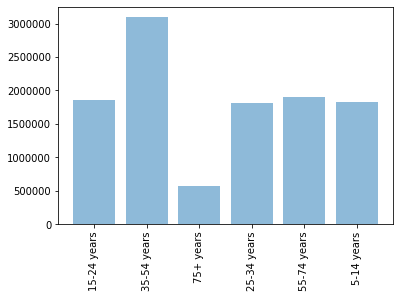

In [57]:
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'], index_population, align = 'center', alpha = 0.5)
plt.xticks(rotation = 90)
plt.show()

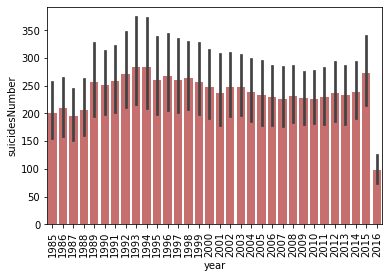

In [61]:
sns.set_color_codes("muted")
sns.barplot(x = "year", y = "suicidesNumber", data = base, label = "Year Suicides", color = "r")
plt.xticks(rotation = 90)
plt.show()

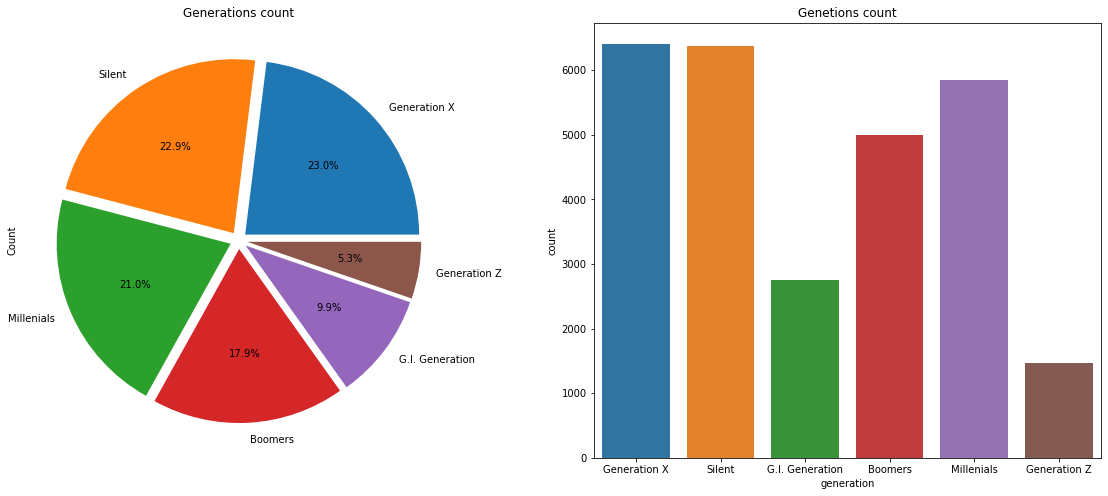

In [71]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
base['generation'].value_counts().plot.pie(explode = [0.05,0.05,0.05,0.05,0.05,0.05], autopct = '%1.1f%%', ax = ax[0], shadow = False)
ax[0].set_title('Generations count')
ax[0].set_ylabel('Count')
sns.countplot('generation', data = base, ax = ax[1])
ax[1].set_title('Genetions count')
plt.show()

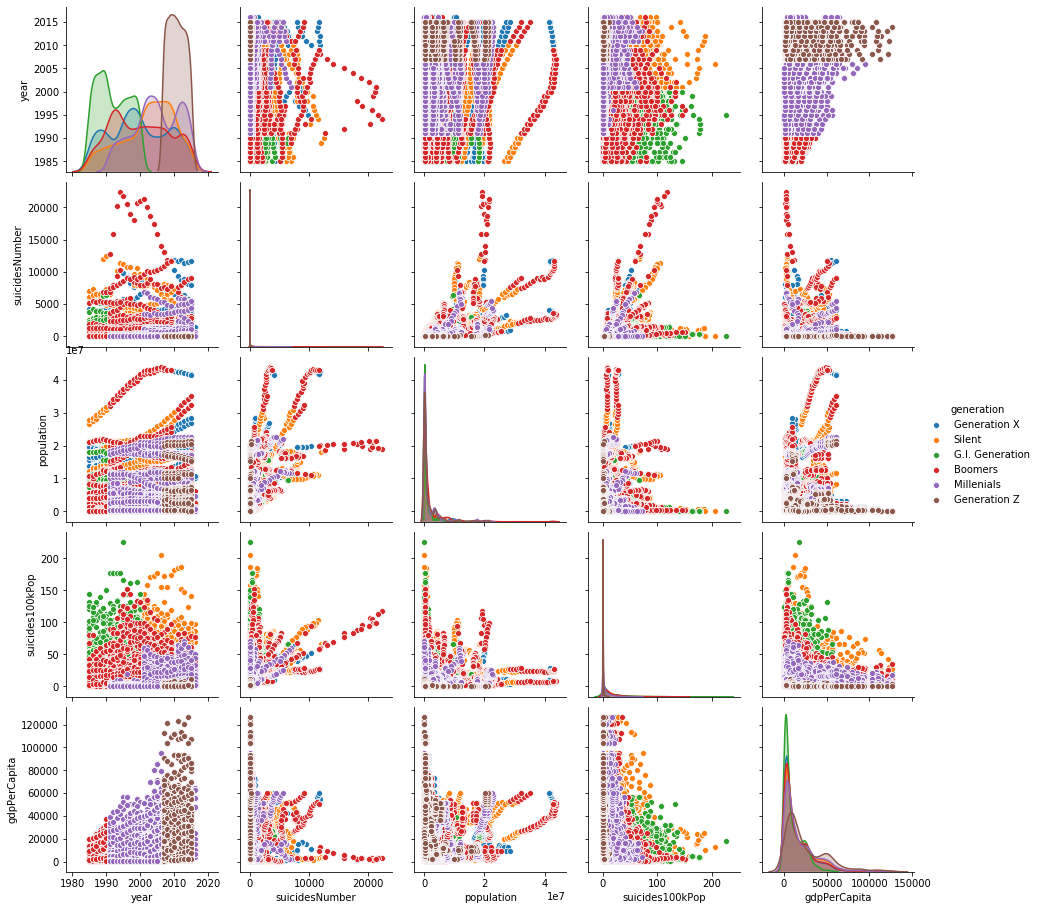

In [73]:
sns.pairplot(base, hue = 'generation')
plt.show()

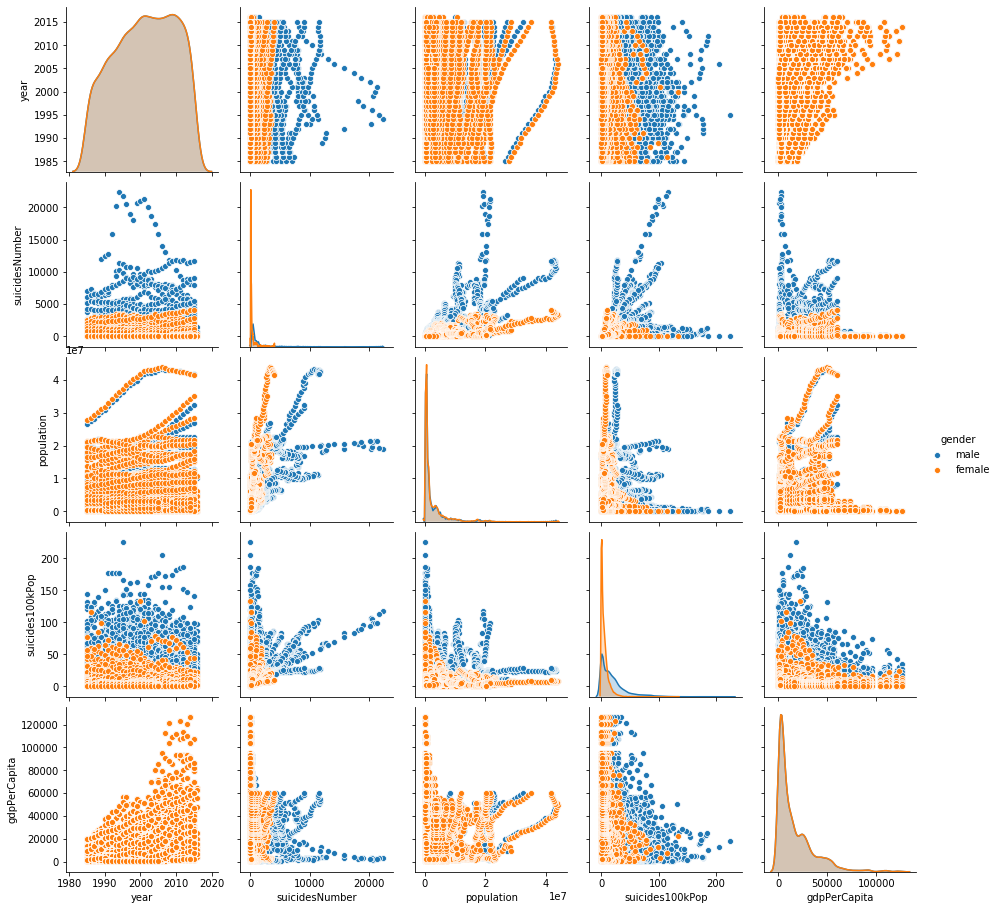

In [74]:
sns.pairplot(base, hue = 'gender')
plt.show()

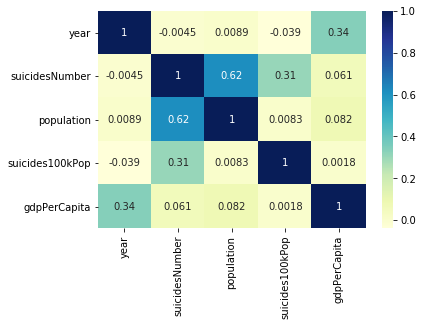

In [75]:
sns.heatmap(base.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

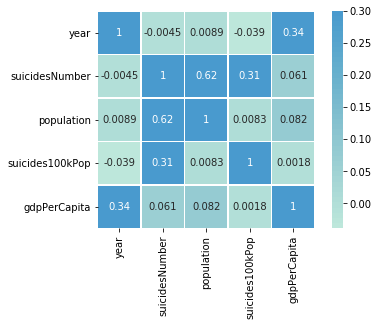

In [84]:
sns.heatmap(base.corr(), vmax = .3, center = 1, square = True, linewidths = .5, annot = True)
plt.show()

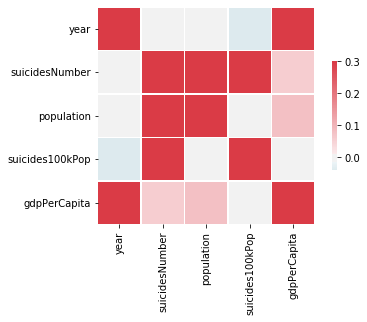

In [86]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(base.corr(), cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show()

In [87]:
max(base.suicidesNumber)

22338

In [88]:
min(base.suicidesNumber)

0

In [89]:
base[base.suicidesNumber == max(base.suicidesNumber)]

,country,year,gender,age,suicidesNumber,population,suicides100kPop,gdpForYear,gdpPerCapita,generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,"395,077,301,248",2853,Boomers


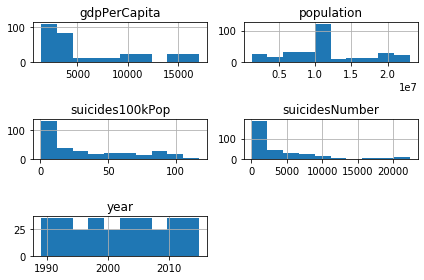

In [90]:
base[base['country']=='Russian Federation'].hist()
plt.tight_layout()
plt.show()

In [91]:
base[base.suicidesNumber == min(base.suicidesNumber)]

,country,year,gender,age,suicidesNumber,population,suicides100kPop,gdpForYear,gdpPerCapita,generation
9,Albania,1987,female,5-14 years,0,311000,0.0,"2,156,624,900",796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.0,"2,156,624,900",796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.0,"2,156,624,900",796,Generation X
22,Albania,1988,female,5-14 years,0,317200,0.0,"2,126,000,000",769,Generation X
23,Albania,1988,male,5-14 years,0,345000,0.0,"2,126,000,000",769,Generation X
...,...,...,...,...,...,...,...,...,...,...
27363,Uruguay,1998,female,5-14 years,0,262973,0.0,"25,385,928,198",8420,Millenials
27459,Uruguay,2006,female,5-14 years,0,260187,0.0,"19,579,457,966",6362,Millenials
27471,Uruguay,2007,female,5-14 years,0,257931,0.0,"23,410,572,634",7581,Generation Z
27495,Uruguay,2009,male,5-14 years,0,263516,0.0,"31,660,911,277",10166,Generation Z


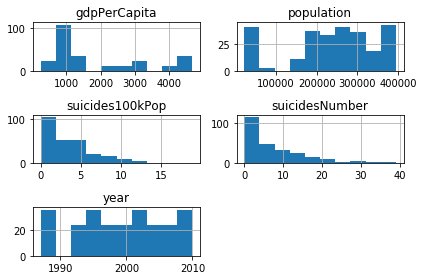

In [92]:
base[base['country'] == 'Albania'].hist()
plt.tight_layout()
plt.show()